# 1. - Data cleaning - Proyecto "Shark" 
#### Empezamos importando las librerias que porbablemente utilizaremos para poder completar esta limpieza de datos

In [85]:
import pandas as pd
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)  # me muestre todas las columnas
import re
import seaborn as sns



### Descarga del archivo para poder trabajar en el


#### Guardamos la ruta del archivo en una variable, para poder utilizarla de forma sencilla.
#### Miramos el archivo con la funcion .head() y seleccionamos 2 filas para ver si todo esta en orden. 

In [2]:

data_shark = pd.read_csv('/Users/JGR/IRON_HACK/Sharks/attacks.csv', encoding='UTF-8',encoding_errors='ignore')

# Enseña la cabeza del DataFrame
data_shark.head(2) 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,NaN,"No injury, knocke off board",N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0


#### Vemos la informacion del archivo globalmente donde podemos ver el numero de columnas, filas, etc...

In [3]:
data_shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25614 entries, 0 to 25613
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6095 non-null   object 
 1   Date                    6094 non-null   object 
 2   Year                    6092 non-null   float64
 3   Type                    6090 non-null   object 
 4   Country                 6048 non-null   object 
 5   Area                    5682 non-null   object 
 6   Location                5583 non-null   object 
 7   Activity                5559 non-null   object 
 8   Name                    5888 non-null   object 
 9   Sex                     5517 non-null   object 
 10  Age                     3374 non-null   object 
 11  Injury                  6066 non-null   object 
 12  Fatal (Y/N)             6064 non-null   object 
 13  Time                    2848 non-null   object 
 14  Species                 3100 non-null 

##### En la pequeña tabla anterior nos enseña el numero total de columnas, el numero total de filas, el numero de nulos que obtiene esta DataFrame y el tipo de Objeto que son.

#### Con el siguiente codigo vemos el numero total de nulos que contiene cada columna y la guardo en una variable que es la que voy a utilizar para limpiarla. 

In [4]:
df = pd.DataFrame(data_shark)
null_counts = df.isna().sum() 
nulls = null_counts[null_counts > 0] 
nulls 

Case Number               19519
Date                      19520
Year                      19522
Type                      19524
Country                   19566
Area                      19932
Location                  20031
Activity                  20055
Name                      19726
Sex                       20097
Age                       22240
Injury                    19548
Fatal (Y/N)               19550
Time                      22766
Species                   22514
Investigator or Source    19537
pdf                       19520
href formula              19521
href                      19521
Case Number.1             19520
Case Number.2             19520
original order            19520
dtype: int64

# 2. - Limpieza de datos y ajustando la DataFrame de una forma que se pueda analizar.

###### En el caso de tener duplicados este archivo, vamos hacer que se eliminen ya que no tendría sentido tenerlos 

In [5]:
df = data_shark.drop_duplicates()

##### Imprimimos el dato general del numero de columnas y filas, y la comparamos con la inicial.

In [6]:
data_shark.shape, df.shape

((25614, 22), (6097, 22))

#### Una vez completado la eliminacion de duplicados, tenemos que proceder a la limpieza de los valores nulos, tal vez poniendolos todos con el mismo valor 
#### La función .fillna() es un método proporcionado por la biblioteca pandas en Python que le permite rellenar valores faltantes o NaN (Not a Number) en un DataFrame o Series de pandas con un valor especificado o un método como forward-fill o backward-fill.

In [7]:
df = df.fillna('0') 

In [8]:
df.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,19,Laceration to left foot,N,10h00,0,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,0,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.07.R,2017.06.07.R,6092.0
4,2017.06.04,2017-06-04,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,0,Laceration to shin,N,0,8' shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.04,2017.06.04,6091.0


#### Ahora procedemos a ver el nombre de todas las columnas, para ver si tenemos que camibar alguna o ver si necesitamos la columna para hacer nuestro estudio. 

In [9]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

#### Vemos que algunas columnas tienen espacios despues del nombres, ej: Sex , en este caso tenemos que ponerlas sin espacios y llevar un orden, hay algunas que empiezan con mayuscula y otras que no.


In [10]:
df = df.rename(columns={'Sex ': 'Sex', 'Species ': 'Specie'}) # Cambia el nombre 

In [11]:
df.columns = df.columns.str.capitalize() # Pone la primera en Mayuscula

In [12]:
df.columns

Index(['Case number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (y/n)', 'Time',
       'Specie', 'Investigator or source', 'Pdf', 'Href formula', 'Href',
       'Case number.1', 'Case number.2', 'Original order'],
      dtype='object')

### Limpia las columnas que quizas no te hagan falta para analizar esta tabla, cambia el nombre de la columna si es necesario, e incluso quita los valores de tales para hacer el trabajo mas ameno.

In [13]:
df = df.rename(columns={'Case number.1': 'Attack Date'}) # Cambio el nombre de la columna a Attack Date

In [14]:
#df['Case number.2'] = 0 # Limpieza de datos que me son irrelevantes

In [15]:
# Podemos borrar los datos de numerosas columnas y covertirlos en otros
columnas = ['Case number.2', 'Name', 'Original order', 'Pdf', 'Href',] 
df.loc[:, columnas] = 0

In [18]:
# Borro los datos de columna tambien, ya que no tiene sentido tenerla
df['Href formula'] = 0  

In [33]:
df.head(4)

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (y/n),Time,Specie,Investigator or source,Pdf,Href formula,Season,Attack Date,Year,Month
0,2017.06.11,2017-06-11,2017,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,0,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",0,0,0,2017.06.11,2017,06
1,2017.06.10.b,2017-06-10,2017,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,0,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,0,0,0,2017.06.10,2017,06
2,2017.06.10.a,2017-06-10,2017,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,0,M,19,Laceration to left foot,N,10h00,0,"Daytona Beach News-Journal, 6/10/2017",0,0,0,2017.06.10,2017,06
3,2017.06.07.R,Reported 07-Jun-2017,2017,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,0,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,0,"3m shark, probably a smooth hound","C. Moore, GSAF",0,0,0,2017.06.07,2017,06


### Voy a trabajar con la columna de Attack Date, así que voy a modificar las dos siguientes para hacer nuestros calculos, voy a renombrar una de ellas a Year y la otra a Month


In [22]:
df = df.rename(columns={"Case number.2": "Year"}) 

In [23]:
df = df.rename(columns={"Original order": "Month"}) 

In [24]:
df.head(2)

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (y/n),Time,Specie,Investigator or source,Pdf,Href formula,Href,Attack Date,Year,Month
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,0,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",0,0,0,2017.06.11,0,0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,0,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,0,0,0,2017.06.10.b,0,0


### Una vez modificada la columnas, voy a limpiar la columa de Attack Date ya que tiene la fecha y algunas letras detras, voy a introducir el año en la casilla de Year y los meses en la casilla de Month.

In [25]:
df["Attack Date"] = df["Attack Date"].str.slice(stop=10)

In [26]:
df.loc[df["Attack Date"].str.startswith("ND"), "Attack Date"] = "NoDataGiven" + df["Attack Date"].str.slice(start=1)

In [34]:
df.head(2)

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (y/n),Time,Specie,Investigator or source,Pdf,Href formula,Season,Attack Date,Year,Month
0,2017.06.11,2017-06-11,2017,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,0,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",0,0,0,2017.06.11,2017,06
1,2017.06.10.b,2017-06-10,2017,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,0,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,0,0,0,2017.06.10,2017,06


In [28]:
# trasladamos los 4 primeros digitos de la columna Attack Date a Year ya que es el año
df["Year"] = df["Attack Date"].str.slice(stop=4)

# Copiar los siguientes 2 dígitos de Attack Date a Month
df["Month"] = df["Attack Date"].str.slice(start=5, stop=7)

In [29]:
# chequeamos para ver si podemos utilizarla despues de estas operaciones
df.head(4)

,Case number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (y/n),Time,Specie,Investigator or source,Pdf,Href formula,Href,Attack Date,Year,Month
0,2017.06.11,2017-06-11,2017,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,0,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",0,0,0,2017.06.11,2017,06
1,2017.06.10.b,2017-06-10,2017,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,0,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,0,0,0,2017.06.10,2017,06
2,2017.06.10.a,2017-06-10,2017,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,0,M,19,Laceration to left foot,N,10h00,0,"Daytona Beach News-Journal, 6/10/2017",0,0,0,2017.06.10,2017,06
3,2017.06.07.R,Reported 07-Jun-2017,2017,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,0,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,0,"3m shark, probably a smooth hound","C. Moore, GSAF",0,0,0,2017.06.07,2017,06


#### Duplico la columna de Meses, para poder obtener la misma informacion y asi trabajar y saber el numero de casos por estacion, solamente quiero tener 22 columnas, del cual voy a borrar una que no tenga informacion.



In [35]:
df['Year Season'] = df['Month'] # duplicamos una nueva columna para hacer por estaciones del año

In [37]:
df = df.drop('Case number', axis=1)

In [39]:
df

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (y/n),Time,Specie,Investigator or source,Pdf,Href formula,Season,Attack Date,Year,Month,Year Season
0,2017-06-11,2017,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,0,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",0,0,0,2017.06.11,2017,06,06
1,2017-06-10,2017,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,0,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,0,0,0,2017.06.10,2017,06,06
2,2017-06-10,2017,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,0,M,19,Laceration to left foot,N,10h00,0,"Daytona Beach News-Journal, 6/10/2017",0,0,0,2017.06.10,2017,06,06
3,Reported 07-Jun-2017,2017,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,0,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,0,"3m shark, probably a smooth hound","C. Moore, GSAF",0,0,0,2017.06.07,2017,06,06
4,2017-06-04,2017,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,0,M,0,Laceration to shin,N,0,8' shark,"Nine News, 6/7/2017",0,0,0,2017.06.04,2017,06,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,1883-1889,NoDa,Unprovoked,PANAMA,0,"Panama Bay 8N, 79W",0,0,M,0,FATAL,Y,0,0,"The Sun, 10/20/1938",0,0,0,NoDataGivenD.0002,NoDa,aG,aG
6093,1845-1853,NoDa,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,0,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,0,0,S.W. Baker,0,0,0,NoDataGivenD.0001,NoDa,aG,aG
6094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,
6101,0,0,0,0,0,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,,


# 3. - Analizando la tabla y sacando conlusiones.

## Mi objetivo son los siguientes:

#### 3. 1 - Numero de registros realizados.
#### 3. 2 - En que temporada del año estos ataques fueron mas frecuentes.
#### 3. 3 - Que pais tiene el numero mas elevado de ataques (top 5).
#### 3. 4 - Entre hombres y mujeres, quienes son los mas afectados.
#### 3. 5 - Cuantos casos fueron grabados como Fatales. (los casos mas grabes)
#### 3. 6 - Que tipo de actividades causaron estos ataques (top 5).
#### 3. 7 - Que tipo de tiburon es el mas peligroso o que mas intervinió, debido a estos datos.
#### 3. 8 - Numero de ataques por año ( de los ultimos 30 años).


## 3. 1 - Numero de registros realizados

In [46]:
data_shark.shape

(25614, 22)

#### Vemos que estos datos tienen 25614 datos registrados en total a la fecha de hoy.

# 3. 2 - En que temporada del año estos ataques fueron mas frecuentes.
Creamos una funcion para determinar en que mes fue el ataque y asi asociarlo a la estacion del año. Vemos el resultado y lo plasmamos en un grafico para visualizarlo.

In [40]:
def get_season(month):
    if month in ['12', '01', '02']:
        return 'Winter'
    elif month in ['03', '04', '05']:
        return 'Spring'
    elif month in ['06', '07', '08']:
        return 'Summer'
    elif month in ['09', '10', '11']:
        return 'Autumn'

# Aplicar la función al DataFrame y crear una nueva columna llamada 'estacion'
df['Year Season'] = df['Year Season'].apply(get_season)

In [42]:
seasons = df['Year Season'].value_counts()
seasons

Summer    1703
Autumn    1344
Winter    1312
Spring    1213
Name: Year Season, dtype: int64

<AxesSubplot:ylabel='Year Season'>

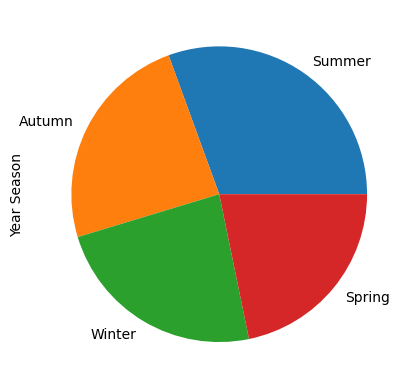

In [43]:
seasons.plot.pie()

### 3. 3 - Que pais tiene el numero mas elevado de ataques (top 5).


In [50]:
Country_counts = df['Country'].value_counts()
top_5_country = Country_counts.head(5)
top_5_country

USA                 2160
AUSTRALIA           1303
SOUTH AFRICA         571
PAPUA NEW GUINEA     133
NEW ZEALAND          126
Name: Country, dtype: int64

<AxesSubplot:ylabel='Country'>

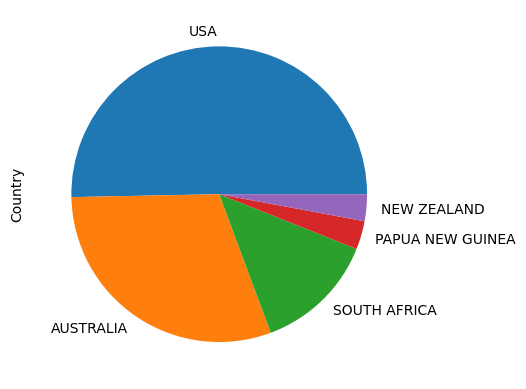

In [51]:
top_5_country.plot.pie()

# 3. 4 - Entre hombres y mujeres, quienes son los mas afectados.

In [60]:
# Porcentaje por Sexo
Sex_counts = df['Sex'].value_counts()
Sex_percentages = Sex_counts / len(df) * 100
S_percentage = Sex_percentages.head(2)

In [61]:
S_percentage

M    80.465803
F     9.939314
Name: Sex, dtype: float64

<AxesSubplot:ylabel='Sex'>

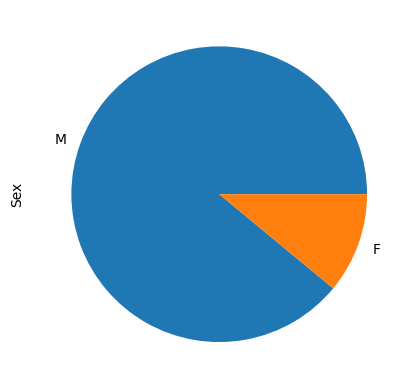

In [62]:
S_percentage.plot.pie()

# 3. 5 - Cuantos casos fueron grabados como Fatales. (los 8 casos mas grabes)

In [65]:
injuries = df['Injury'].value_counts()
injurie = injuries.head(8)

In [66]:
injurie

FATAL                746
Survived              97
Foot bitten           83
No injury             79
Leg bitten            71
Left foot bitten      49
No details            43
Right foot bitten     39
Name: Injury, dtype: int64

<AxesSubplot:ylabel='Injury'>

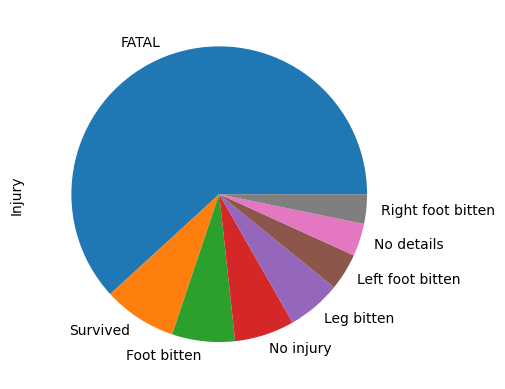

In [67]:
injurie.plot.pie()

# 3. 6 - Que tipo de actividades causaron estos ataques (top 5)

In [68]:
activity = df['Activity'].value_counts()
activity_percentage = activity.head(10) / len(df) *100
activity_percentage

Surfing         15.269805
Swimming        13.646055
0                8.824012
Fishing          6.806626
Spearfishing     5.330490
Bathing          2.525832
Wading           2.394620
Diving           2.050189
Standing         1.590946
Snorkeling       1.361325
Name: Activity, dtype: float64

<AxesSubplot:ylabel='Activity'>

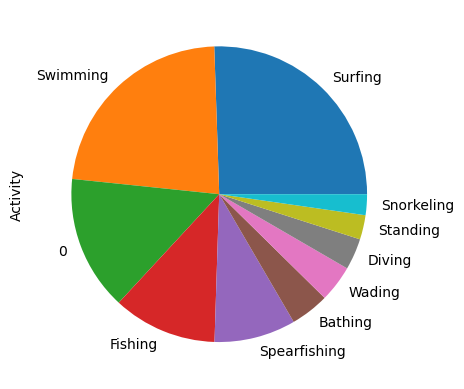

In [69]:
activity_percentage.plot.pie()

# 3. 7 - Que tipo de tiburon es el mas peligroso o que mas intervinió, debido a estos datos

In [70]:
Type_of_Shark = df['Specie'].value_counts()
Top_Shark_Species = Type_of_Shark.head(5)
Top_Shark_Species

0                                  2997
White shark                         164
Shark involvement not confirmed      81
Tiger shark                          73
Bull shark                           53
Name: Specie, dtype: int64

<AxesSubplot:ylabel='Specie'>

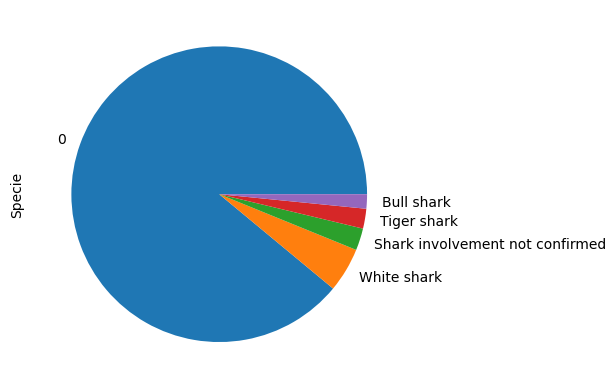

In [71]:
Top_Shark_Species.plot.pie()

# 3. 7 - Que tipo de tiburon es el mas peligroso o que mas intervinió, debido a estos datos

##### De entre todos los tiburones más peligrosos del mundo, el gran tiburón blanco es el más mortífero de todos ellos. No en vano, es el depredador más grande y peligroso de todos los océanos. Algunos pueden llegar a pesar más de una tonelada. Suelen habitar aguas de América del Norte, el sur de África y Australia.

In [75]:
Sharks_type = df['Specie'].value_counts()
Sharks_top_5 = Sharks_type.head(5)
Sharks_top_5

0                                  2997
White shark                         164
Shark involvement not confirmed      81
Tiger shark                          73
Bull shark                           53
Name: Specie, dtype: int64

<AxesSubplot:ylabel='Specie'>

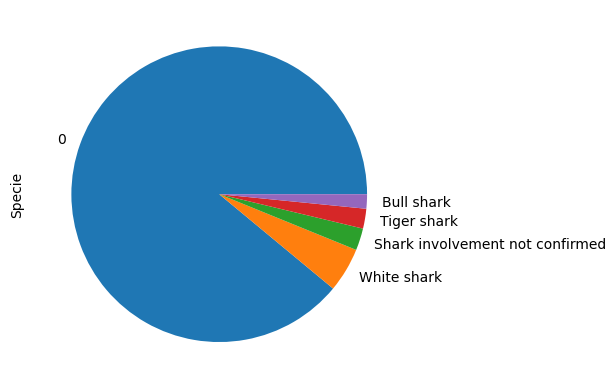

In [76]:
Sharks_top_5.plot.pie()

# 3. 8 - Numero de ataques por año ( de los ultimos 30 años).

In [103]:
df.head(2)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (y/n),Time,Specie,Investigator or source,Pdf,Href formula,Season,Attack Date,Year,Month,Year Season
0,2017-06-11,2017,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,0,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",0,0,0,2017,2017,06,Summer
1,2017-06-10,2017,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,0,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,0,0,0,2017,2017,06,Summer


In [127]:
df['Attack Date'] = df['Attack Date'].astype(str).str[:4]

# group the new column by its values and count the number of occurrences of each value
count_by_value = df.groupby('Attack Date').size().reset_index(name='count')

# sort the resulting groupby object by the count of occurrences in descending order
count_by_value = count_by_value.sort_values('count', ascending=False)

# print the resulting table
first_15_years = count_by_value.head(15)
first_15_years.reset_index(drop=True)

,Attack Date,count
0,2015,142
1,2011,128
2,2016,127
3,2014,125
4,2013,123
5,2008,122
6,2009,120
7,NoDa,119
8,2012,117
9,2007,112
